In [1]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2

(852, 1280, 3)
[[[29 34 25]
  [29 34 25]
  [30 35 26]
  ...
  [28 49 71]
  [22 43 65]
  [17 38 60]]

 [[29 34 25]
  [29 34 25]
  [30 35 26]
  ...
  [30 51 73]
  [24 45 67]
  [19 40 62]]

 [[29 34 25]
  [30 35 26]
  [30 35 26]
  ...
  [34 55 77]
  [28 49 71]
  [24 45 67]]

 ...

 [[11 37 21]
  [ 6 32 16]
  [10 31 16]
  ...
  [27 75 47]
  [15 63 35]
  [ 8 56 28]]

 [[ 8 34 18]
  [ 3 29 13]
  [ 7 28 13]
  ...
  [32 80 52]
  [24 72 44]
  [25 73 45]]

 [[ 1 27 11]
  [ 0 25  9]
  [ 7 28 13]
  ...
  [27 75 47]
  [31 79 51]
  [45 93 65]]]


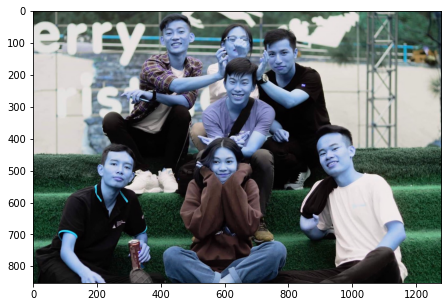

In [2]:
# image_raw = imread("imagejpg/imgg_origin.jpg")
image_raw = cv2.imread("imagejpg/imgg_origin.jpg", 1)
print(image_raw.shape)
print(image_raw)
plt.figure(figsize=[10,5])
plt.imshow(image_raw)

[[34 34 35 ... 49 43 38]
 [34 34 35 ... 51 45 40]
 [34 35 35 ... 55 49 45]
 ...
 [37 32 31 ... 75 63 56]
 [34 29 28 ... 80 72 73]
 [27 25 28 ... 75 79 93]]


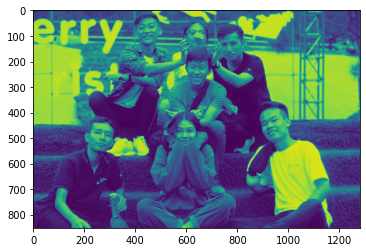

In [3]:
print(image_raw[:, :, 1])
plt.imshow(image_raw[:, :, 0])
# plt.imshow(image_raw[:, :, 1])
# plt.imshow(image_raw)

In [4]:
print((image_raw[:, :, 2].shape))
print(image_raw[0,0,:])

(852, 1280)
[29 34 25]


[[ 88  88  91 ... 148 130 115]
 [ 88  88  91 ... 154 136 121]
 [ 88  91  91 ... 166 148 136]
 ...
 [ 69  54  57 ... 149 113  92]
 [ 60  45  48 ... 164 140 143]
 [ 39  34  48 ... 149 161 203]]
763
1.0
[[0.11533421 0.11533421 0.11926606 ... 0.19397117 0.17038008 0.15072084]
 [0.11533421 0.11533421 0.11926606 ... 0.20183486 0.17824377 0.15858453]
 [0.11533421 0.11926606 0.11926606 ... 0.21756225 0.19397117 0.17824377]
 ...
 [0.0904325  0.07077326 0.07470511 ... 0.19528178 0.14809961 0.12057667]
 [0.07863696 0.05897772 0.06290957 ... 0.21494102 0.18348624 0.18741809]
 [0.05111402 0.04456094 0.06290957 ... 0.19528178 0.21100917 0.26605505]]


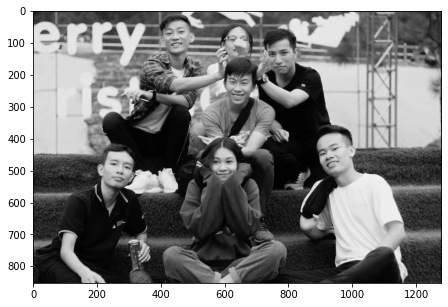

In [5]:
img_sum = image_raw.sum(axis=2)
print(img_sum)
print(img_sum.max())
img_bw = img_sum/img_sum.max()
print(img_bw.max())
print(img_bw)
plt.figure(figsize=[10,5])
plt.imshow(img_bw, cmap=plt.cm.gray)


Number of components explaining 99.5% variance: 161


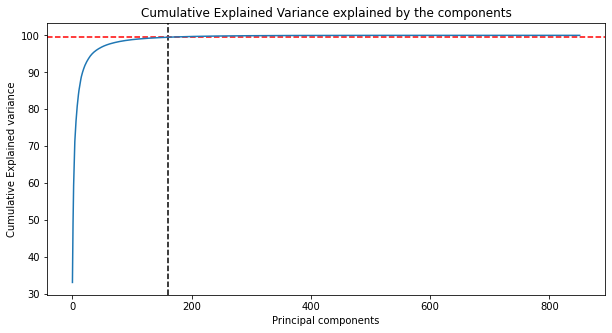

In [13]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(img_bw)

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
percen_chosen = 99.5
k = np.argmax(var_cumu>percen_chosen)
print(f"Number of components explaining {percen_chosen}% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=percen_chosen, color="r", linestyle="--")
ax = plt.plot(var_cumu)
plt.savefig('cumsum.jpg')

In [7]:
print(var_cumu.shape)
print(pca.explained_variance_ratio_.shape)

(852,)
(852,)


161
ipca :  IncrementalPCA(n_components=171)
batch size :  None
origin :  (852, 1280)
compressed :  (852, 171) (171, 1280)


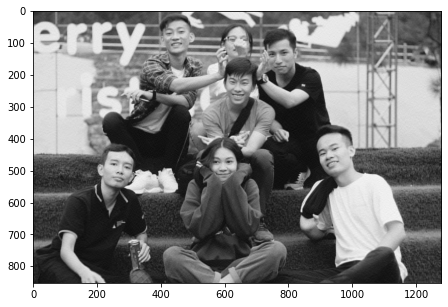

In [8]:

ipca = IncrementalPCA(n_components=k+10)
print(k)
print('ipca : ', ipca)
print('batch size : ', ipca.batch_size)
img_pre = ipca.fit_transform(img_bw)
print('origin : ', img_bw.shape)
print('compressed : ', img_pre.shape, ipca.components_.shape)
image_compressed = ipca.inverse_transform(img_pre)
                                        
# Plotting the compressed image
plt.figure(figsize=[10,5])
plt.imshow(image_compressed, cmap=plt.cm.gray)


In [9]:
print(k)

161


In [10]:
def plot_with_k(k):
    ipca = IncrementalPCA(n_components=k)
    img_pre_com = ipca.fit_transform(img_bw)
    img_recon = ipca.inverse_transform(img_pre_com)
    plt.figure(figsize=[10,5])
    plt.title('Component : '+ str(k))
    plt.imshow(img_recon, cmap=plt.cm.gray)
    return img_recon

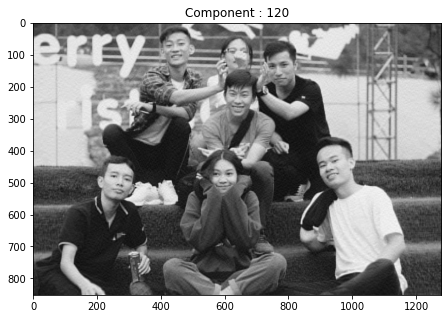

In [11]:
import cv2
img_test1 = plot_with_k(120)

# cv2.imwrite('test1.jpg', img_test1)


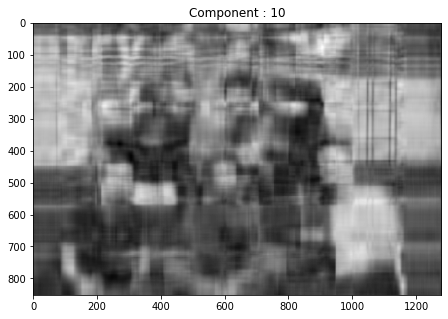

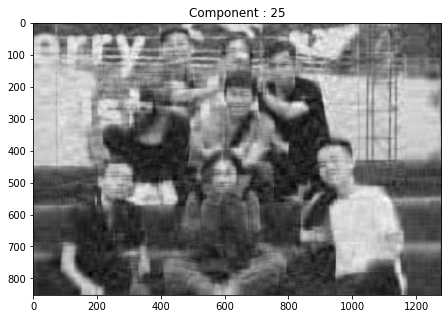

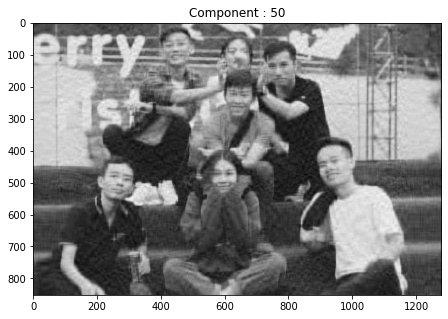

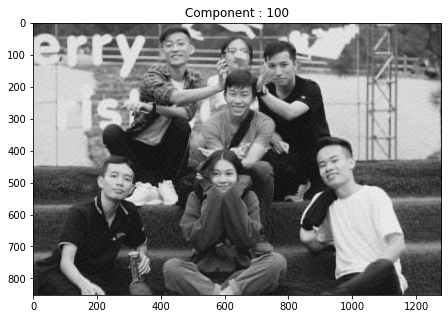

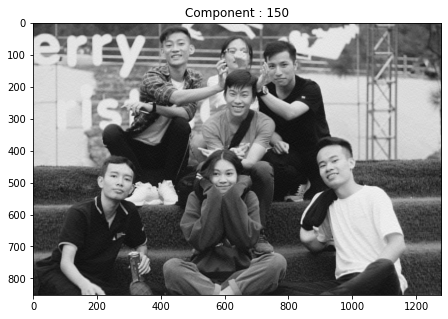

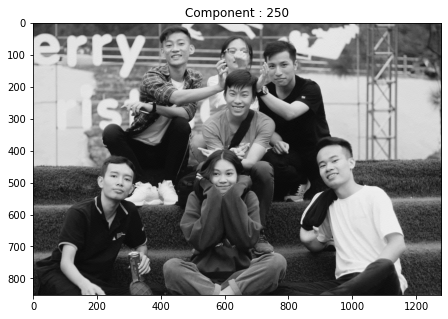

In [12]:
ks = [10, 25, 50, 100, 150, 250]
for k in ks:
    plot_with_k(k)

# plt.savefig('test1.jpg')